<a href="https://colab.research.google.com/github/IshanaySharma/Machine_learning_projects/blob/main/ANN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(type(x), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [13]:
print(x.shape,y.shape)

(303, 13) (303,)


In [14]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.25) 

In [18]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(227, 13)
(76, 13)
(227,)
(76,)


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

In [65]:
print(x_train.shape)

(76, 13)


In [49]:
m1 = Sequential()
m1.add(Dense(128,input_dim=13,activation='relu'))
m1.add(Dense(64,activation='relu'))
m1.add(Dense(32,activation='relu'))
m1.add(Dense(1,activation='sigmoid'))

m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
3/3 [==============================] - 0s 103ms/step - loss: 0.3804 - accuracy: 0.8026 - val_loss: 0.6749 - val_accuracy: 0.6828
Epoch 2/20
3/3 [==============================] - 0s 52ms/step - loss: 0.3285 - accuracy: 0.8421 - val_loss: 0.6694 - val_accuracy: 0.7004
Epoch 3/20
3/3 [==============================] - 0s 33ms/step - loss: 0.2998 - accuracy: 0.8553 - val_loss: 0.6771 - val_accuracy: 0.6696
Epoch 4/20
3/3 [==============================] - 0s 40ms/step - loss: 0.3328 - accuracy: 0.8289 - val_loss: 0.6606 - val_accuracy: 0.7004
Epoch 5/20
3/3 [==============================] - 0s 34ms/step - loss: 0.3213 - accuracy: 0.8421 - val_loss: 0.6577 - val_accuracy: 0.7004
Epoch 6/20
3/3 [==============================] - 0s 49ms/step - loss: 0.3172 - accuracy: 0.8684 - val_loss: 0.8755 - val_accuracy: 0.6344
Epoch 7/20
3/3 [==============================] - 0s 51ms/step - loss: 0.4807 - accuracy: 0.6974 - val_loss: 0.6839 - val_accuracy: 0.6652
Epoch 8/20
3/3 [==========

In [77]:
r1 = pd.DataFrame(h1.history)
r1['Epochs']= h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
15,0.387012,0.855263,0.736420,0.687225,15
16,0.505079,0.776316,0.720817,0.704846,16
17,0.543084,0.736842,0.913233,0.660793,17
18,0.397351,0.802632,1.307550,0.559471,18
19,0.590358,0.697368,0.841568,0.660793,19


<function matplotlib.pyplot.show>

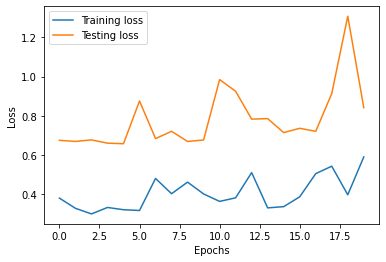

In [78]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

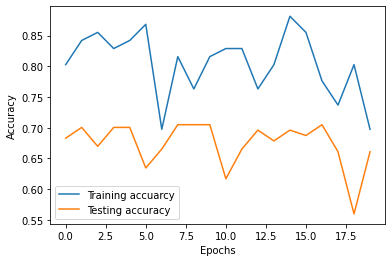

In [79]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training accuarcy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [80]:
ypred_m1 = m1.predict(x_test)
print(len(ypred_m1))

227


In [81]:
print(ypred_m1)

[[0.44394693]
 [0.0371224 ]
 [0.9445983 ]
 [0.12474501]
 [0.98951465]
 [0.00512746]
 [0.05269498]
 [0.91073734]
 [0.8173254 ]
 [0.95880663]
 [0.06850076]
 [0.9969255 ]
 [0.9309437 ]
 [0.8834464 ]
 [0.49490324]
 [0.12921321]
 [0.40239638]
 [0.46857023]
 [0.7301941 ]
 [0.39587831]
 [0.37138343]
 [0.9752524 ]
 [0.01371223]
 [0.07455996]
 [0.9464282 ]
 [0.6575282 ]
 [0.86259973]
 [0.9977783 ]
 [0.98779154]
 [0.9708292 ]
 [0.9976913 ]
 [0.00756609]
 [0.95414484]
 [0.9966806 ]
 [0.9800439 ]
 [0.32981622]
 [0.9990089 ]
 [0.12833953]
 [0.80778074]
 [0.01160437]
 [0.2217575 ]
 [0.73538285]
 [0.96560967]
 [0.985592  ]
 [0.8057074 ]
 [0.68995184]
 [0.93353266]
 [0.9822166 ]
 [0.9548309 ]
 [0.958529  ]
 [0.9750128 ]
 [0.8685676 ]
 [0.80379725]
 [0.6052383 ]
 [0.85795397]
 [0.9850699 ]
 [0.983559  ]
 [0.9352841 ]
 [0.98986566]
 [0.22888544]
 [0.74025226]
 [0.7899125 ]
 [0.27112752]
 [0.8056244 ]
 [0.94047576]
 [0.05637559]
 [0.9627646 ]
 [0.5457255 ]
 [0.9976299 ]
 [0.8654568 ]
 [0.17060146]
 [0.93

In [82]:
ypred_m1= list(map(lambda x: 1 if x> 0.5 else 0,ypred_m1))
print(ypred_m1)

[0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]


In [84]:
from sklearn.metrics import confusion_matrix,classification_report

In [85]:
print(y_test[:5])

34     1
231    0
212    0
139    1
171    0
Name: target, dtype: int64


In [86]:
print(confusion_matrix(y_test,ypred_m1))

[[ 45  58]
 [ 19 105]]


In [87]:
print(classification_report(y_test,ypred_m1))

              precision    recall  f1-score   support

           0       0.70      0.44      0.54       103
           1       0.64      0.85      0.73       124

    accuracy                           0.66       227
   macro avg       0.67      0.64      0.64       227
weighted avg       0.67      0.66      0.64       227

